In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv("../Files/cluster_mpg.csv")

In [33]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [34]:
df_w_dummies = pd.get_dummies(df.drop("name", axis=1))


In [35]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler()

In [38]:
scaled_data = scaler.fit_transform(df_w_dummies)


In [39]:
scaled_df=pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
model=AgglomerativeClustering(n_clusters=3)

In [42]:
cluster_labels = model.fit_predict(scaled_df)


In [43]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

<AxesSubplot: xlabel='mpg', ylabel='weight'>

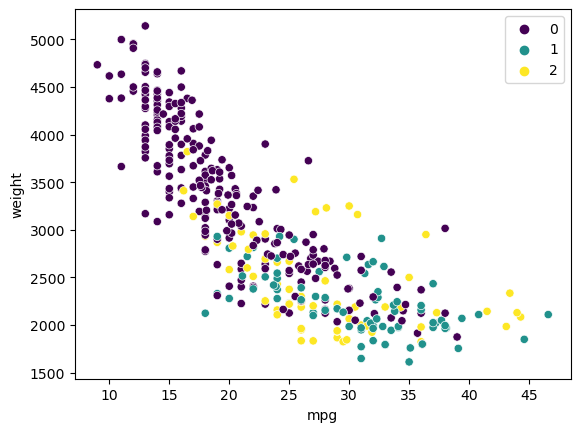

In [44]:
sb.scatterplot(data=df, x="mpg", y="weight",
               hue=cluster_labels, palette="viridis")


In [45]:
model=AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [46]:
cluster_labels=model.fit_predict(scaled_data)

In [47]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [48]:
from scipy.cluster.hierarchy import dendrogram


In [49]:
from scipy.cluster import hierarchy

In [50]:
linkage_matrix=hierarchy.linkage(model.children_)

In [51]:
linkage_matrix 

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

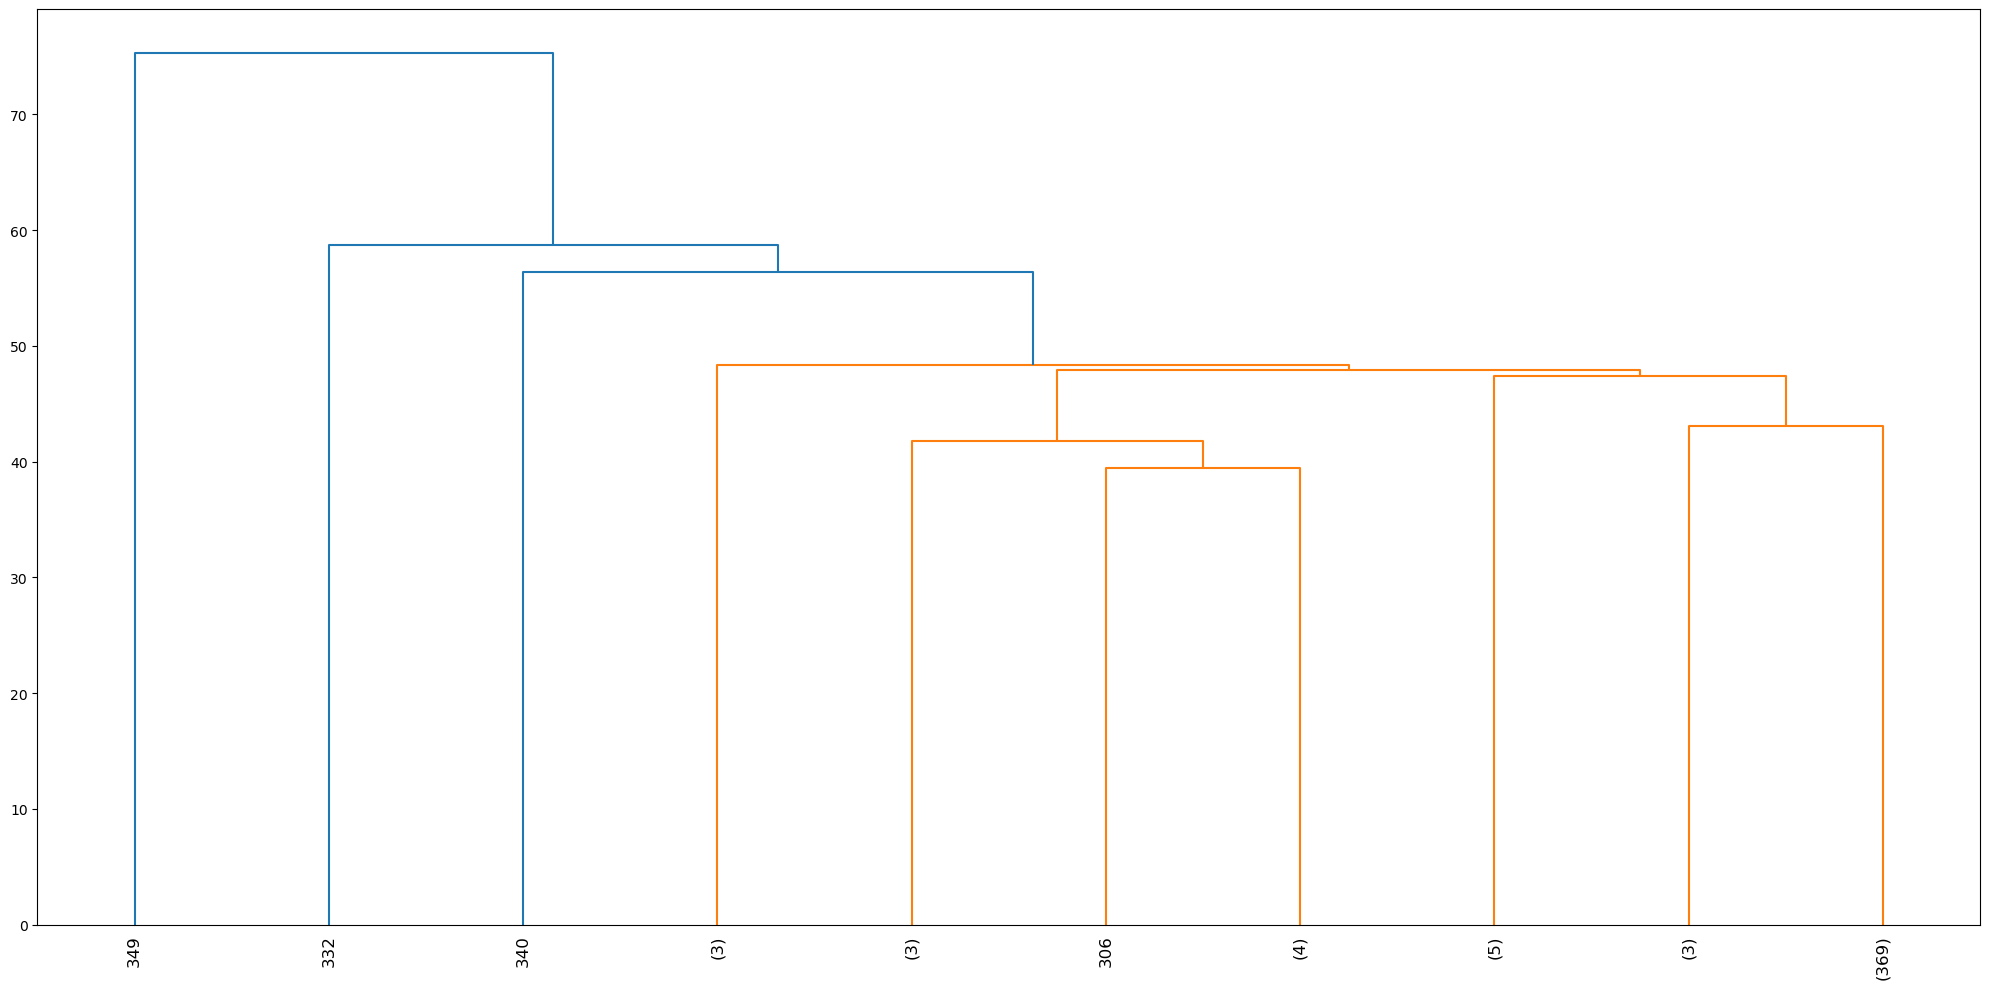

In [52]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix,p=10,truncate_mode="lastp")
plt.xticks(rotation=90)
plt.tight_layout()

In [53]:
dendro

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [35.0, 35.0, 67.5, 67.5],
  [25.0, 25.0, 51.25, 51.25],
  [15.0, 15.0, 38.125, 38.125],
  [5.0, 5.0, 26.5625, 26.5625]],
 'dcoord': [[0.0, 39.408120990476064, 39.408120990476064, 0.0],
  [0.0, 41.78516483155236, 41.78516483155236, 39.408120990476064],
  [0.0, 43.08131845707603, 43.08131845707603, 0.0],
  [0.0, 47.41307836451879, 47.41307836451879, 43.08131845707603],
  [41.78516483155236, 47.92702786528704, 47.92702786528704, 47.41307836451879],
  [0.0, 48.373546489791295, 48.373546489791295, 47.92702786528704],
  [0.0, 56.4003546088143, 56.4003546088143, 48.373546489791295],
  [0.0, 58.69412236331676, 58.69412236331676, 56.4003546088143],
  [0.0, 75.32595834106593, 75.32595834106593, 58.69412236331676]],
 'ivl': ['349',
  '332',
  '340',
  '(3)',
  '(3)',
  '306',
  '(4)',
  '(5)',
  '(3)',
  '(369)'],
 'leaves': [349, 332, 340, 606, 7

In [55]:
np.sqrt(len(scaled_df.columns))  # max distance two points


3.1622776601683795

In [56]:
scaled_df["mpg"].idxmax()

320

In [58]:
scaled_df["mpg"].idxmin()

28

In [59]:
car_a=scaled_df.iloc[320]
car_b=scaled_df.iloc[28]

In [60]:
distance = np.linalg.norm(car_a-car_b)


In [61]:
distance

2.3852929970374714